<a href="https://colab.research.google.com/github/TheKnight909/T5/blob/main/Linear_Regression_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Salary Data.csv")

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.shape

(375, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years of Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


In [7]:
df.describe(include="object").T

,count,unique,top,freq
Gender,373,2,Male,194
Education Level,373,3,Bachelor's,224
Job Title,373,174,Director of Marketing,12


In [8]:
df.isna().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [9]:
df[df.isna().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [12]:
df.duplicated().sum()

49

In [13]:
df.nunique()

,0
Age,31
Gender,2
Education Level,3
Job Title,174
Years of Experience,28
Salary,36


In [14]:
for col in df.columns:
  print(col,df[col].unique(),"\n")

Age [32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53.] 

Gender ['Male' 'Female'] 

Education Level ["Bachelor's" "Master's" 'PhD'] 

Job Title ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Admi

In [15]:
# We need to reset our index after all the dropping
df.reset_index(inplace=True, drop=True)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
num=["Age","Years of Experience"]
cat=["Gender","Education Level","Job Title"]
num_transformer=Pipeline([
        ("scaler",StandardScaler())
])
cat_transformer=Pipeline([
        ("encoder",OneHotEncoder(handle_unknown="ignore"))
])

preprocessor=ColumnTransformer(
    transformers=[
        ("num",num_transformer,num),
        ("cat",cat_transformer,cat)
    ]
)
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression()),
    ]
)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Years of Experience']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('regressor', LinearRegression())])

In [55]:
X = df.drop('Salary', axis=1)
Y = df['Salary']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [56]:
x_train.head()

,Age,Gender,Education Level,Job Title,Years of Experience
340,31.0,Female,Bachelor's,Junior Financial Analyst,3.0
122,33.0,Female,Bachelor's,Junior Operations Analyst,5.0
212,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0
63,47.0,Male,PhD,Senior Data Scientist,21.0
135,39.0,Female,Bachelor's,Administrative Assistant,10.0


In [57]:
y_train.head()

,Salary
340,50000.0
122,50000.0
212,85000.0
63,180000.0
135,55000.0


In [58]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Years of Experience']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('regressor', LinearRegression())])

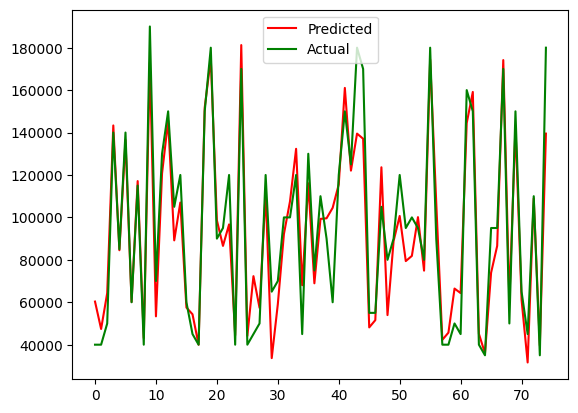

In [59]:
y_pred = model.predict(x_test)

# plot the difference between the actual and predicted values
import matplotlib.pyplot as plt

plt.plot(range(len(y_pred)), y_pred, label='Predicted', c='red')
plt.plot(range(len(y_test)), y_test, label='Actual', c='green')
plt.legend()
plt.show()

In [60]:
model.score(x_test, y_test) # R^2

0.8896576278656085

In [61]:
from sklearn.metrics import r2_score, mean_squared_error
metrics = {
    'R2': r2_score(y_test, model.predict(x_test)),
    'RMSE': mean_squared_error(y_test, model.predict(x_test))
}
metrics

{'R2': 0.8896576278656085, 'RMSE': 224251990.55725214}